In [15]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors

In [2]:
X_train = pd.read_csv("./IMDB dataset/IMDB dataset/X_train.csv", header=None)
y_train = pd.read_csv("./IMDB dataset/IMDB dataset/y_train.csv", header=None)
X_test = pd.read_csv("./IMDB dataset/IMDB dataset/X_test.csv", header=None)
y_test = pd.read_csv("./IMDB dataset/IMDB dataset/y_test.csv", header=None)

rng = np.random.RandomState(1)
indices = rng.permutation(len(X_train))
X_train = np.array(X_train)[indices]
y_train = np.array(y_train).reshape((-1))[indices]
X_test = np.array(X_test)
y_test = np.array(y_test).reshape((-1))

In [3]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (25000, 1000)
y_train shape: (25000,)
X_test shape: (25000, 1000)
y_test shape: (25000,)


In [4]:
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

# Logistic regression

In [6]:
val_accs_LR = []
train_accs_LR = []
c_vals_LR = [0.01,0.04,0.1,0.5,1]
for c in c_vals_LR:
    clf_LR = LogisticRegression(C = c, solver = "liblinear", random_state=1)
    cv_results = cross_validate(clf_LR, X_train, y_train, cv=4, return_train_score=True)
    train_accs_LR.append(np.round(100*np.mean(cv_results["train_score"]),2))
    val_accs_LR.append(np.round(100*np.mean(cv_results["test_score"]),2))

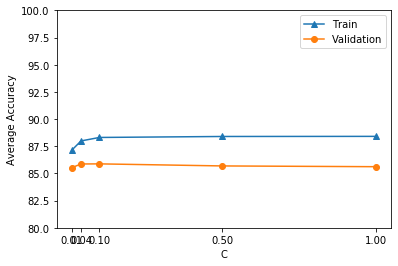

In [7]:
plt.plot(c_vals_LR,train_accs_LR, marker="^",label="Train")
plt.plot(c_vals_LR,val_accs_LR, marker="o", label="Validation")
_ = plt.xticks(c_vals_LR)
plt.xlabel("C")
plt.ylabel("Average Accuracy")
plt.ylim(bottom=80, top=100)
plt.legend()

Text(0, 0.5, 'Validation Accuracy')

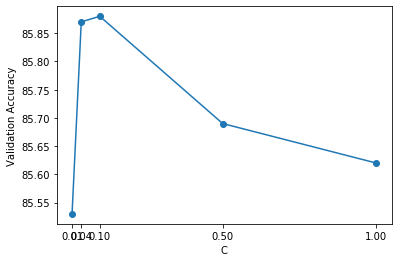

In [8]:
plt.plot(c_vals_LR,val_accs_LR, marker="o")
_ = plt.xticks(c_vals_LR)
plt.xlabel("C")
plt.ylabel("Validation Accuracy")

In [9]:
print("Best parameter is C=0.04")
print("Validation accuracy: {}".format(val_accs_LR[1]))

Best parameter is C=0.04
Validation accuracy: 85.87


### RUN FROM HERE

In [11]:
optimal_C = 0.04
clf = LogisticRegression(random_state=0, C=optimal_C, solver = "liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]

In [16]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [17]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [19]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,3,0.0,1.0,20638,0.0,9.22,5810,1.0,9.27,10931,1.0,9.27
1,8,0.0,1.0,1907,1.0,7.28,9852,1.0,7.35,8232,0.0,7.42
2,17,0.0,1.0,22503,1.0,8.43,11202,1.0,8.43,19713,0.0,8.43
3,22,1.0,0.0,6158,0.0,6.86,2402,1.0,6.93,20821,1.0,7.00
4,25,1.0,0.0,18487,0.0,10.20,10304,0.0,10.30,1519,1.0,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...
3431,24949,1.0,0.0,4713,1.0,7.35,1554,0.0,7.35,1011,1.0,7.55
3432,24966,0.0,1.0,20821,1.0,6.16,1907,1.0,6.16,8232,0.0,6.16
3433,24975,1.0,0.0,1554,0.0,7.48,3555,0.0,7.75,1932,0.0,7.87
3434,24981,1.0,0.0,11183,1.0,11.45,12741,1.0,11.45,6425,1.0,11.49


In [21]:
idx = 0 #between 0 and 3435
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 3 is misclassified.
True class: 0.0
Predicted class: 1.0
Neighbor#1: Train index 20638 ; True Class 0.0 ; Distance 9.22
Neighbor#2: Train index 5810 ; True Class 1.0 ; Distance 9.27
Neighbor#3: Train index 10931 ; True Class 1.0 ; Distance 9.27


In [18]:
s0=time.time()
clf_LR = LogisticRegression(C = 0.04, random_state=1).fit(X_train, y_train)
s1= time.time()
print("Training time {}".format(s1-s0))
preds_LR = clf_LR.predict(X_test)
print("testing time {}".format(time.time()-s1))
print("Accuracy on the test: {}".format(np.round(100*np.sum(preds_LR==y_test)/len(y_test),2)))

Training time 1.5186679363250732
testing time 0.035012245178222656
Accuracy on the test: 86.23


C:\Users\baili\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.09351
Feature: 2, Score: 0.11104
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00062
Feature: 5, Score: 0.07989
Feature: 6, Score: -0.11742
Feature: 7, Score: -0.08330
Feature: 8, Score: -0.13159
Feature: 9, Score: 0.12708
Feature: 10, Score: -0.15425
Feature: 11, Score: -0.01362
Feature: 12, Score: 0.14216
Feature: 13, Score: 0.07860
Feature: 14, Score: -0.13262
Feature: 15, Score: -0.04574
Feature: 16, Score: -0.17868
Feature: 17, Score: 0.01323
Feature: 18, Score: -0.01061
Feature: 19, Score: 0.04418
Feature: 20, Score: -0.13010
Feature: 21, Score: -0.04389
Feature: 22, Score: 0.04929
Feature: 23, Score: -0.03958
Feature: 24, Score: -0.17355
Feature: 25, Score: 0.21876
Feature: 26, Score: 0.01091
Feature: 27, Score: 0.02930
Feature: 28, Score: -0.05757
Feature: 29, Score: -0.02342
Feature: 30, Score: -0.04330
Feature: 31, Score: -0.00894
Feature: 32, Score: 0.01024
Feature: 33, Score: -0.05300
Feature: 34, Score: -0.06137
Feature: 35

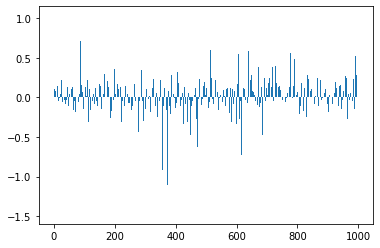

In [9]:
importance_LR = clf_LR.coef_[0]
for i,v in enumerate(importance_LR):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_LR))], importance_LR)
plt.show()

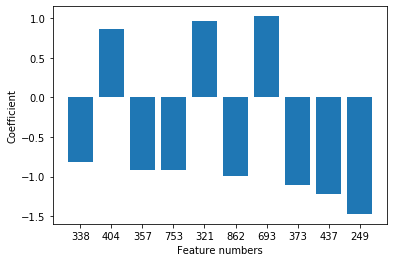

In [41]:
sorted_importance_LR = np.argsort(np.abs(importance_LR))
top_features_LR = importance_LR[sorted_importance_LR[-10:]]
plt.bar([x for x in range(len(top_features_LR))], top_features_LR)
plt.xticks(np.arange(len(top_features_LR)), sorted_importance_LR[-10:])
plt.xlabel("Feature numbers")
plt.ylabel("Coefficient")
plt.show()

# Multinomial Naive Bayes with additive smoothing

In [22]:
train_accs_NB = []
val_accs_NB = []
clf_NB = MultinomialNB()
#val_accs_NB.append(np.round(100*np.mean(cross_val_score(clf_NB, X_train, y_train, cv=cv)),2))
cv_results = cross_validate(clf_NB, X_train, y_train, cv=4, return_train_score=True)
train_accs_NB.append(np.round(100*np.mean(cv_results["train_score"]),2))
val_accs_NB.append(np.round(100*np.mean(cv_results["test_score"]),2))

### RUN FROM HERE

In [25]:
clf =  MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]

In [27]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [28]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [29]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,4,1.0,0.0,10429,1.0,7.14,22665,1.0,7.21,17031,0.0,7.28
1,5,1.0,0.0,18149,1.0,7.28,21247,0.0,7.35,18209,0.0,7.35
2,8,0.0,1.0,1907,1.0,7.28,9852,1.0,7.35,8232,0.0,7.42
3,17,0.0,1.0,22503,1.0,8.43,11202,1.0,8.43,19713,0.0,8.43
4,25,1.0,0.0,18487,0.0,10.20,10304,0.0,10.30,1519,1.0,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,24980,1.0,0.0,1907,1.0,8.00,2402,1.0,8.06,6158,0.0,8.12
4188,24985,1.0,0.0,10429,1.0,6.08,5705,1.0,6.40,4859,1.0,6.48
4189,24988,1.0,0.0,1554,0.0,8.60,18209,0.0,8.66,12362,1.0,8.66
4190,24993,0.0,1.0,21633,0.0,5.00,8232,0.0,5.20,4830,1.0,5.29


In [37]:
idx = 2 #between 0 and 4191
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 8 is misclassified.
True class: 0.0
Predicted class: 1.0
Neighbor#1: Train index 1907 ; True Class 1.0 ; Distance 7.28
Neighbor#2: Train index 9852 ; True Class 1.0 ; Distance 7.35
Neighbor#3: Train index 8232 ; True Class 0.0 ; Distance 7.42


In [31]:
print("Validation accuracy: {}".format(val_accs_NB[0]))

Validation accuracy: 83.22


In [32]:
print("Training accuracy: {}".format(train_accs_NB[0]))

Training accuracy: 83.72


In [33]:
s0 = time.time()
clf_NB = MultinomialNB().fit(X_train, y_train)
s1 = time.time()
print("Training time {}".format(s1-s0))
preds_NB = clf_NB.predict(X_test)
print("Testing time {}".format(time.time()-s1))
print("Accuracy on the test: {}".format(np.round(100*np.sum(preds_NB==y_test)/len(y_test),2)))

Training time 0.0669851303100586
Testing time 0.05994391441345215
Accuracy on the test: 83.23


In [34]:
confs = {0:[],1:[]}
for x in X_test[(preds_NB==y_test)]:
    confs[0].append(clf_NB.predict_log_proba(x.reshape((1,-1)))[0][0])
    confs[1].append(clf_NB.predict_log_proba(x.reshape((1,-1)))[0][1])

In [35]:
confs_x = {0:[],1:[]}
for x in X_test[(preds_NB!=y_test)]:
    confs_x[0].append(clf_NB.predict_proba(x.reshape((1,-1)))[0][0])
    confs_x[1].append(clf_NB.predict_proba(x.reshape((1,-1)))[0][1])
    #print(clf_NB.predict_log_proba(x.reshape((1,-1))))

In [36]:
df = pd.DataFrame(columns=["P(x0)", "P(x1)","Prediction", "True"])
df["P(x0)"] =confs_x[0]
df["P(x1)"] =confs_x[1]
df["Prediction"] = np.array(preds_NB)[(preds_NB!=y_test)]
df["True"] = y_test[(preds_NB!=y_test)]
df

,P(x0),P(x1),Prediction,True
0,0.514713,0.485287,0.0,1.0
1,0.912193,0.087807,0.0,1.0
2,0.002995,0.997005,1.0,0.0
3,0.104526,0.895474,1.0,0.0
4,0.908372,0.091628,0.0,1.0
...,...,...,...,...
4187,0.645397,0.354603,0.0,1.0
4188,0.818536,0.181464,0.0,1.0
4189,0.964355,0.035645,0.0,1.0
4190,0.209953,0.790047,1.0,0.0


[ 80 104 106 102  98 103  99  96  91  41  86 114  84  95  73  85  83 116
  89  68 100  93 101  65  88  97  79  77  81  76  92  74  71  63  55  72
  67  70  61  66  69  58  54  53  78  62  56  64  45  29  47  52  27  60
  57  51  49  50  37  44  46  36  42  34  39  48  43  35  40  38  32  25
  33  22  26  31  30  10  28  17  24  23  20  16  19  18  21  13  15  12
  11   9  14   8   7   5   6   4   2   1]
[ 59  98 110 113  99  90 111  88  94 103 119  75  81  93  84  89  77  71
  96 118  79  83  57  86  76  74  69  41  72  85  60  80  91  66  68  62
  64  82  63  70  61  56  65  67  87  73  58  50  45  51  49  43  42  54
  53  36  52  48  55  44  46  29  47  38  40  27  37  39  34  33  35  25
  32  28  30  20  22  26  24  31  10  16  23  17  21  19  18  13  15  12
  14  11   9   8   7   6   5   4   2   1]


Text(0.5, 1.0, 'Top 10 features for the positive class')

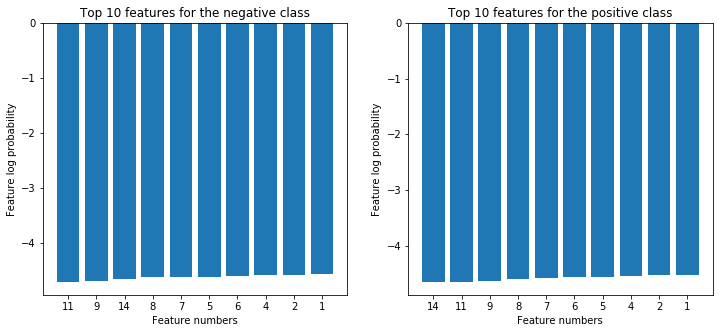

In [102]:
#top ten most predictive words for each of your classes
neg_class_prob_sorted = clf_NB.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = clf_NB.feature_log_prob_[1, :].argsort()

print(np.take(np.arange(1000), neg_class_prob_sorted[-100:]))
print(np.take(np.arange(1000), pos_class_prob_sorted[-100:]))
top_words[0] = neg_class_prob_sorted[-100:]
top_words[1] = pos_class_prob_sorted[-100:]
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(np.arange(10), clf_NB.feature_log_prob_[0, :][neg_class_prob_sorted[-10:]])
plt.xticks(np.arange(10),np.take(np.arange(1000), neg_class_prob_sorted[-10:]))
plt.xlabel("Feature numbers")
plt.ylabel("Feature log probability")
plt.title("Top 10 features for the negative class")
plt.subplot(1,2,2)
plt.bar(np.arange(10), clf_NB.feature_log_prob_[1, :][pos_class_prob_sorted[-10:]])
plt.xticks(np.arange(10),np.take(np.arange(1000), pos_class_prob_sorted[-10:]))
plt.xlabel("Feature numbers")
plt.ylabel("Feature log probability")
plt.title("Top 10 features for the positive class")

# Random Forest

In [145]:
train_accs_RF = dict()
val_accs_RF = dict()
c_vals_RF = [10,50,100,150,200,250,300]
max_d_RF = [5,10,15,20,25,30]
for d in max_d_RF:
    train_accs_RF[d] = []
    val_accs_RF[d] = []
    for c in c_vals_RF:
        clf_RF = RandomForestClassifier(n_estimators =c , max_depth=d, random_state=0)
        cv_results = cross_validate(clf_RF, X_train, y_train, cv=4, return_train_score=True)
        train_accs_RF[d].append(np.round(100*np.mean(cv_results["train_score"]),2))
        val_accs_RF[d].append(np.round(100*np.mean(cv_results["test_score"]),2))

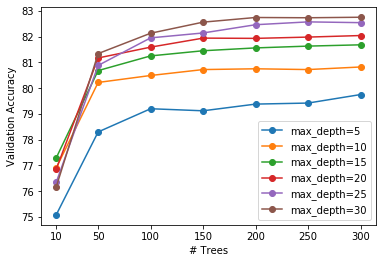

In [146]:
for d in max_d_RF:
    plt.plot(c_vals_RF,val_accs_RF[d], marker="o", label="max_depth={}".format(d))
_ = plt.xticks(c_vals_RF)
plt.xlabel("# Trees")
plt.ylabel("Validation Accuracy")
plt.legend()

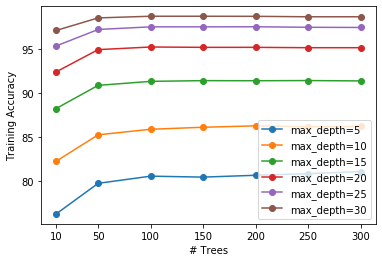

In [152]:
for d in max_d_RF:
    plt.plot(c_vals_RF,train_accs_RF[d], marker="o", label="max_depth={}".format(d))
_ = plt.xticks(c_vals_RF)
plt.xlabel("# Trees")
plt.ylabel("Training Accuracy")
plt.legend()

### RUN FROM HERE

In [38]:
optimal_c = 200
optimal_d =  25
clf =  RandomForestClassifier(n_estimators =optimal_c , max_depth=optimal_d, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]

In [40]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [41]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [42]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,3,0.0,1.0,20638,0.0,9.22,5810,1.0,9.27,10931,1.0,9.27
1,4,1.0,0.0,10429,1.0,7.14,22665,1.0,7.21,17031,0.0,7.28
2,8,0.0,1.0,1907,1.0,7.28,9852,1.0,7.35,8232,0.0,7.42
3,17,0.0,1.0,22503,1.0,8.43,11202,1.0,8.43,19713,0.0,8.43
4,26,0.0,1.0,3900,1.0,9.59,12966,1.0,9.75,10557,1.0,9.75
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,24975,1.0,0.0,1554,0.0,7.48,3555,0.0,7.75,1932,0.0,7.87
4322,24979,1.0,0.0,785,1.0,12.53,6224,0.0,12.61,2640,1.0,12.61
4323,24980,1.0,0.0,1907,1.0,8.00,2402,1.0,8.06,6158,0.0,8.12
4324,24981,1.0,0.0,11183,1.0,11.45,12741,1.0,11.45,6425,1.0,11.49


In [43]:
idx = 2 #between 0 and 4325
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 8 is misclassified.
True class: 0.0
Predicted class: 1.0
Neighbor#1: Train index 1907 ; True Class 1.0 ; Distance 7.28
Neighbor#2: Train index 9852 ; True Class 1.0 ; Distance 7.35
Neighbor#3: Train index 8232 ; True Class 0.0 ; Distance 7.42


In [6]:
s0 = time.time()
clf_RF = RandomForestClassifier(n_estimators =200 , max_depth=25, random_state=0).fit(X_train, y_train)
s1 = time.time()
print("Training time {}".format(s1-s0))
preds_RF = clf_RF.predict(X_test)
print("Testing time {}".format(time.time()-s0))
print("Accuracy on the test: {}".format(np.round(100*np.sum(preds_RF==y_test)/len(y_test),2)))

Training time 37.109423875808716
Testing time 38.71289014816284
Accuracy on the test: 82.7


In [156]:
train_accs_RF[25][4]

97.57

In [157]:
val_accs_RF[25][4]

82.46

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00009
Feature: 5, Score: 0.00033
Feature: 6, Score: 0.00031
Feature: 7, Score: 0.00055
Feature: 8, Score: 0.00050
Feature: 9, Score: 0.00095
Feature: 10, Score: 0.00124
Feature: 11, Score: 0.00077
Feature: 12, Score: 0.00087
Feature: 13, Score: 0.00124
Feature: 14, Score: 0.00096
Feature: 15, Score: 0.00102
Feature: 16, Score: 0.00155
Feature: 17, Score: 0.00143
Feature: 18, Score: 0.00110
Feature: 19, Score: 0.00111
Feature: 20, Score: 0.00256
Feature: 21, Score: 0.00120
Feature: 22, Score: 0.00142
Feature: 23, Score: 0.00113
Feature: 24, Score: 0.00156
Feature: 25, Score: 0.00121
Feature: 26, Score: 0.00117
Feature: 27, Score: 0.00173
Feature: 28, Score: 0.00143
Feature: 29, Score: 0.00125
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00130
Feature: 32, Score: 0.00118
Feature: 33, Score: 0.00124
Feature: 34, Score: 0.00129
Feature: 35, Score: 0.00140
Fe

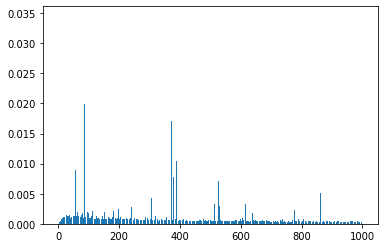

In [148]:
importance_RF = clf_RF.feature_importances_
for i,v in enumerate(importance_RF):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

In [149]:
sorted_importance_RF = np.argsort(importance_RF)[-10:]
top_features_RF = importance_RF[sorted_importance_RF]

Text(0, 0.5, 'Feature importance')

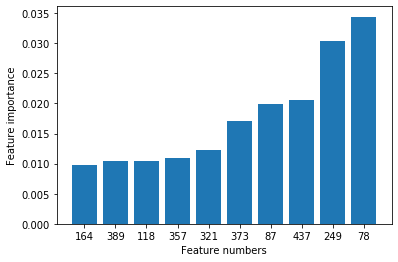

In [162]:
plt.bar(np.arange(10), top_features_RF)
plt.xticks(np.arange(10),sorted_importance_RF[-10:])
plt.xlabel("Feature numbers")
plt.ylabel("Feature importance")